# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import random
from scipy import stats
from scipy.stats import norm

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.style as style
style.use('fivethirtyeight')

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import PowerTransformer

# Modelling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Loading the Training & Testing Dataset

In [2]:
train = pd.read_csv('C:/Users/K2/OneDrive - Georgia State University/GSU - MSA - Assignment Submission/MSA 8010 - Data Programming/Final Project/train.csv')
test = pd.read_csv('C:/Users/K2/OneDrive - Georgia State University/GSU - MSA - Assignment Submission/MSA 8010 - Data Programming/Final Project/test.csv')

train = train.set_index('Id')
test = test.set_index('Id')

In [3]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
train.shape

(1460, 80)

# Exploratory Data Analysis

### Analysing the Target Variable, SalePrice

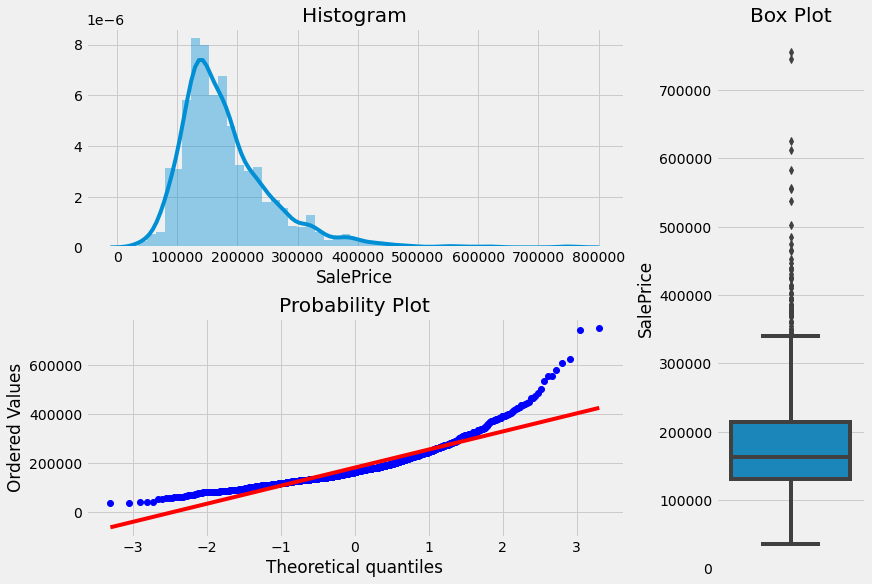

In [5]:
def plotting_3_chart(df, feature):

    # Creating a customized chart and defining the layout. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    # creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # Customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot') 
    stats.probplot(df.loc[:,feature], plot = ax2)

    # Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'SalePrice')

#### We can see that our predictor variable is right-skewed. The measure of the skew can be determined by looking at the Skewness and Kurtosis metrics for this variable.

In [6]:
# Skewness and Fisher's Kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Ideally, for a Standard Normal distribution, Skewness and Fisher's Kurtosis should be equal to 0. The assumptions of a Linear Regression model include that Multivariate Normality and Homoscedasticity. Since that is not the case for SalePrice, we will need to normalize this variable (and any other variables which are skewed) before we train our model.

### Correlation of Features

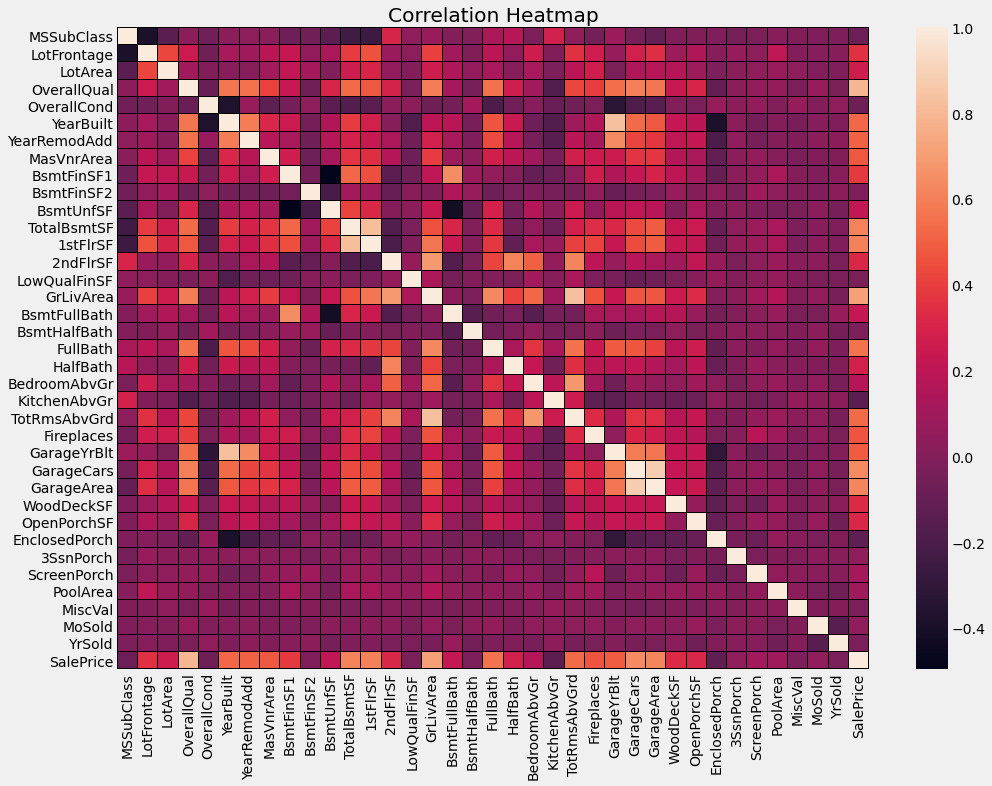

In [7]:
correlations= train.corr(method='pearson')
plt.figure(figsize=(15,11))
sns.heatmap(correlations,linewidths=0.005,linecolor='k')
plt.title('Correlation Heatmap')
plt.show()

##### Estimating the Top 10 Correlated features with SalePrice

In [8]:
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:].head(10)

OverallQual     0.625652
GrLivArea       0.502149
GarageCars      0.410124
GarageArea      0.388667
TotalBsmtSF     0.376481
1stFlrSF        0.367057
FullBath        0.314344
TotRmsAbvGrd    0.284860
YearBuilt       0.273422
YearRemodAdd    0.257151
Name: SalePrice, dtype: float64

### More plots for Exploring the data

In [9]:
# #### SalePrice vs OverallQual

#import sns
import seaborn as sns
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

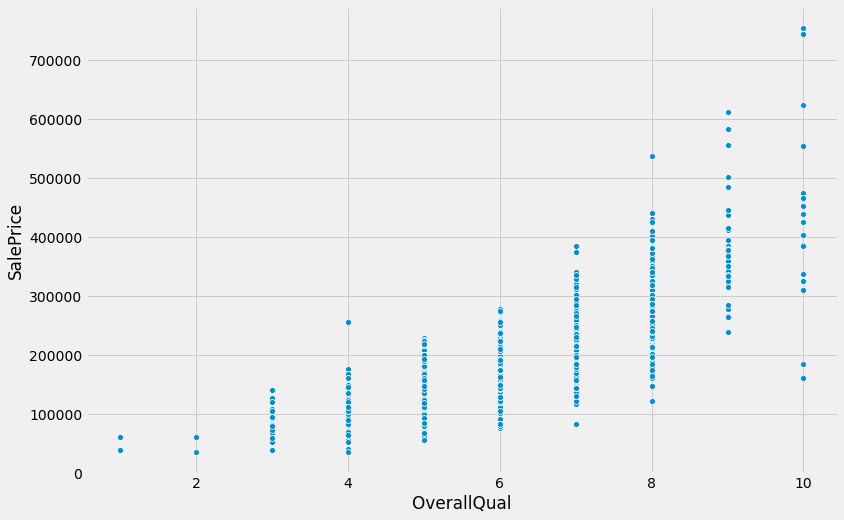

In [10]:
customized_scatterplot(train.SalePrice, train.OverallQual)

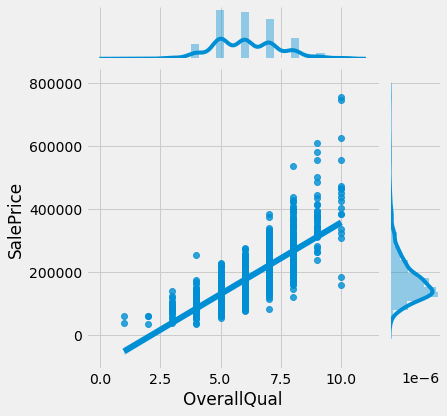

In [11]:
sns.jointplot(x=train['OverallQual'], y=train['SalePrice'], kind='reg')

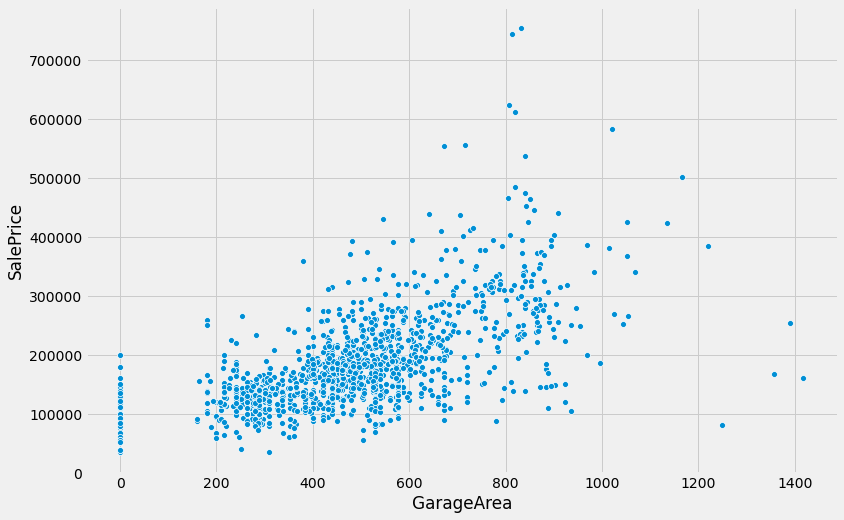

In [12]:
# #### SalePrice vs GrLivArea
customized_scatterplot(train.SalePrice, train.GarageArea)

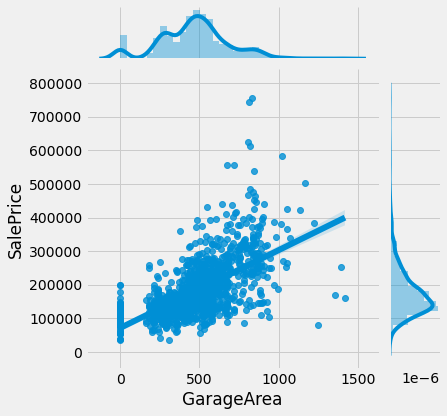

In [13]:
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg')

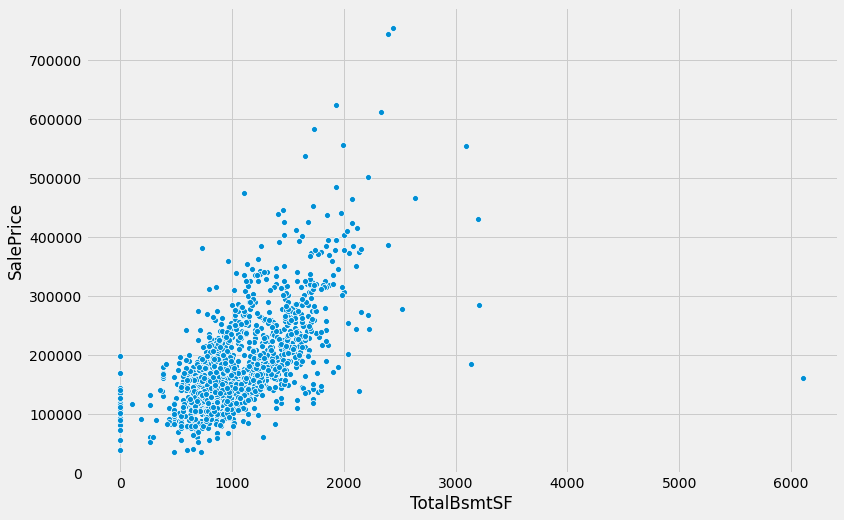

In [14]:
# #### SalePrice vs TotalBsmtSF
customized_scatterplot(train.SalePrice, train.TotalBsmtSF)

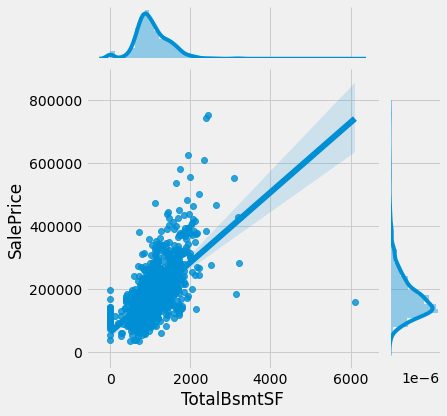

In [15]:
sns.jointplot(x=train['TotalBsmtSF'], y=train['SalePrice'], kind='reg')

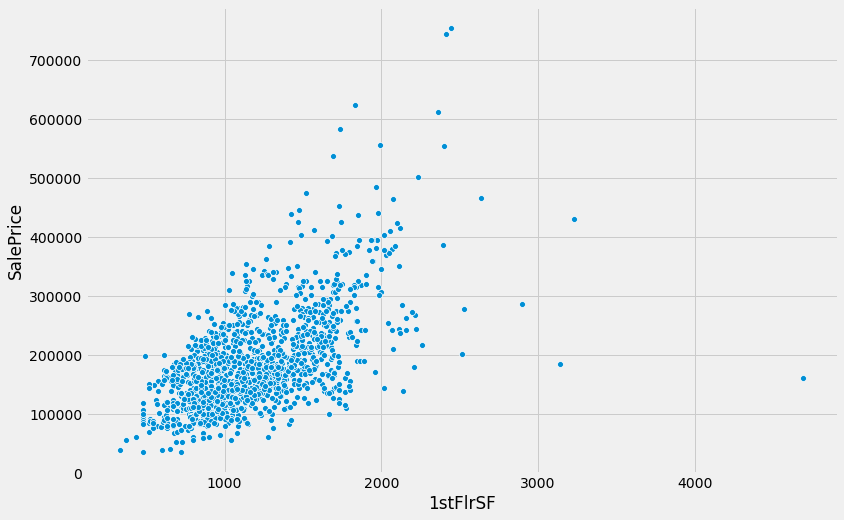

In [16]:
# #### SalePrice vs 1stFlrSF
customized_scatterplot(train.SalePrice, train['1stFlrSF'])

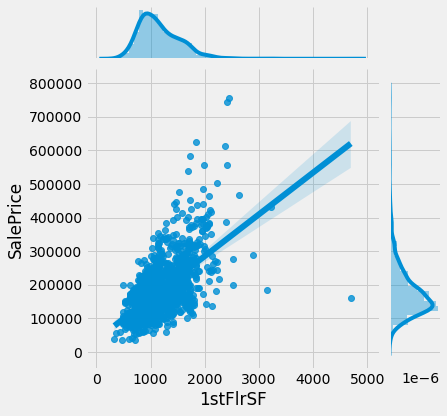

In [17]:
sns.jointplot(x=train['1stFlrSF'], y=train['SalePrice'], kind='reg')

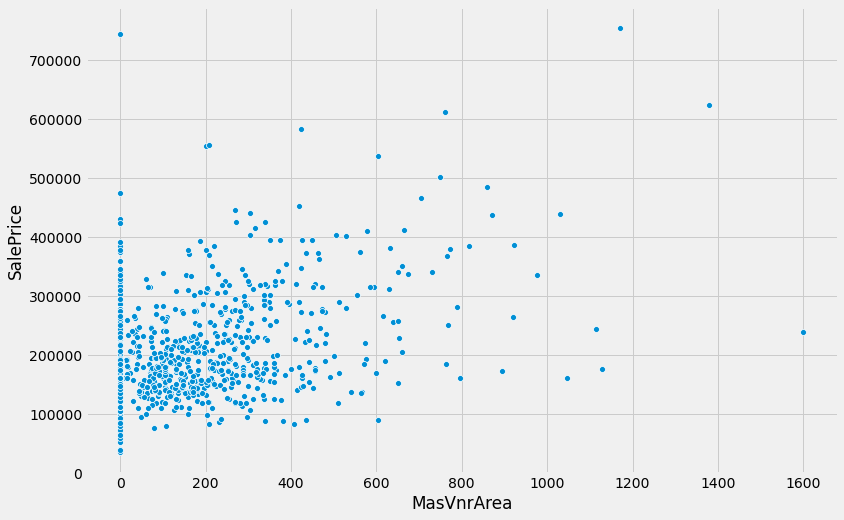

In [18]:
# #### SalePrice vs MasVnrArea
customized_scatterplot(train.SalePrice, train.MasVnrArea)

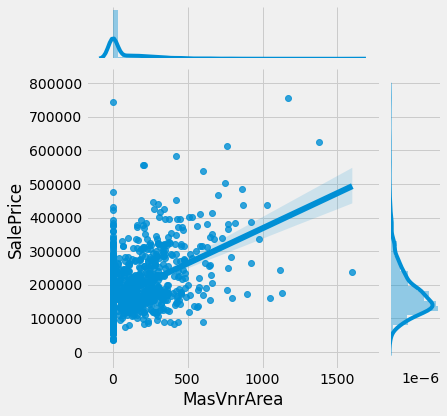

In [19]:
sns.jointplot(x=train['MasVnrArea'], y=train['SalePrice'], kind='reg')

## Feature Engineering

### Separating the Predictor Variable, SalePrice, to apply the feature transformations to the training and testing dataset.

In [20]:
Y = train['SalePrice'].reset_index(drop=True) #Saleprice column
X = train.drop(['SalePrice'], axis=1) #Remaining Training dataset

In [21]:
X.shape, Y.shape

((1460, 79), (1460,))

In [22]:
X.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal


In [23]:
test.shape

(1459, 79)

In [24]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [26]:
#Combining the training and the testing dataset for feature transformations
combined_dataset = X.append(test, sort=False)

combined_dataset.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml


In [27]:
combined_dataset.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [28]:
combined_dataset.iloc[1459,:] #1459 is the index of the last row from the training dataset in the combined dataset.

MSSubClass           20
MSZoning             RL
LotFrontage          75
LotArea            9937
Street             Pave
                  ...  
MiscVal               0
MoSold                6
YrSold             2008
SaleType             WD
SaleCondition    Normal
Name: 1460, Length: 79, dtype: object

In [29]:
# Transforming the non-numeric predictors, which are stored as numbers and converting them into strings 

def type_transform (df):
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['YearBuilt'] = df['YearBuilt'].astype(str)
    df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)
    df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)
    df['OverallQual'] = df['OverallQual'].astype(str)
    df['OverallCond'] = df['OverallCond'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)

    return df

In [30]:
type_transform(combined_dataset)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


### Estimating Missing Values

In [31]:
#Missing Data

def missing_percentage (df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage""" 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [32]:
missing_percentage(combined_dataset)

,Total,Percent
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageCond,159,5.45
GarageQual,159,5.45
GarageFinish,159,5.45
GarageType,157,5.38


In [33]:
#Dropping columns with more than 90% missing values from the Combined Dataset

del combined_dataset['PoolQC']
del combined_dataset['MiscFeature']
del combined_dataset['Alley']

In [34]:
combined_dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NaN,0,12,2008,WD,Normal


In [35]:
combined_dataset.shape

(2919, 76)

### Missing Value Treatment

In [36]:
def treat_missing (df):
    #The data description states that NA in the column Functional refers to typical ('Typ') values
    df['Functional'] = df['Functional'].fillna('Typ')
    
    #Replacing missing values in the following columns having categorical data with the mode of the column. These columns
    #features that are typically found in any house.
    for column in ['Electrical', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType', 'Utilities']:
        df[column].fillna(df[column].mode()[0], inplace=True)
        
    #The following features relate to the Basement of the house. NA values in these columns refer to the absence of a 
    #basement. Hence, we will replace the missing values in all the categorical variables as None, and in the numerical and
    #Boolean variables as 0.
    for column in ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']:
        df[column] = df[column].fillna('None')
    for column in ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:    
        df[column] = df[column].fillna(0)
        
    #The following features relate to the Garage of the house. NA values in these columns refer to the absence of a 
    #Garage. We will replicate the treatment that we used for the missing values for the Basement features here.
    for column in ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']:
        df[column] = df[column].fillna('None')
    for column in ['GarageArea', 'GarageCars', 'GarageYrBlt']:
        df[column] = df[column].fillna(0)
        
    #The following features relate to the masonry veneer walls of the house. NA values in these columns refer to the absence
    #of a masonry veneer wall.
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    
    #For handling missing values in the MSZoning column, we look at the corresponding value in the MSSubClass column, and
    #replace the missing values by the mode of the values in the MSZoning column against the value in the MSSubClass column.
    df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    #For the following categorical features, according to the data dictionary, missing values indicate the absence of the 
    #feature in the house. Hence, we will replace all the missing values with None.
    for column in ['Fence', 'FireplaceQu']:
        df[column] = df[column].fillna('None')
    
    #Filling missing values in LotFrontage using the median of the coloumn corresponding to the neighborhood
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
        
    return df
    

In [37]:
treat_missing(combined_dataset)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,None,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,None,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,None,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,None,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,None,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,None,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,None,0,9,2006,WD,Abnorml


In [38]:
missing_percentage(combined_dataset) #checking for any missing values again

,Total,Percent


### Adding New Numerical Features

In [39]:
def add_numerical_features(df):
    #Total Bathrooms
    df['TotBathrooms'] = df['FullBath'] + (df['HalfBath']*0.5) + df['BsmtFullBath'] + (df['BsmtHalfBath']*0.5)
    #Total Surface Area
    df['TotalSF'] = (df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'])
    #Total Porch Surface Area
    df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
    
    return df

In [40]:
add_numerical_features(combined_dataset)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotBathrooms,TotalSF,Total_porch_sf
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,0,2,2008,WD,Normal,3.5,2566.0,61
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,None,0,5,2007,WD,Normal,2.5,2524.0,298
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,None,0,9,2008,WD,Normal,3.5,2706.0,42
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,None,0,2,2006,WD,Abnorml,2.0,2473.0,307
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,None,0,12,2008,WD,Normal,3.5,3343.0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,0,6,2006,WD,Normal,1.5,1638.0,0
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,0,4,2006,WD,Abnorml,1.5,1638.0,24
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,0,9,2006,WD,Abnorml,2.0,2448.0,474


### Transforming the features to remove Skew using Box-Cox power transformation

In [41]:
def fixing_skewness(df):    
    # Getting all the data that are not of "object" type, i.e., getting all numeric data types 
    numeric_features = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)    
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feature in skewed_features:
        df[feature] = boxcox1p(df[feature], boxcox_normmax(df[feature]+1))
    
    return df

In [42]:
fixing_skewness(combined_dataset)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotBathrooms,TotalSF,Total_porch_sf
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,14.663551,13.424521,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,None,0.000000,2,2008,WD,Normal,3.5,22.970609,18.721470
2,20,RL,16.494888,13.694528,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,None,0.000000,5,2007,WD,Normal,2.5,22.864282,51.575372
3,60,RL,15.044952,14.034134,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,None,0.000000,9,2008,WD,Normal,3.5,23.315715,14.644414
4,70,RL,14.008495,13.683422,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,None,0.000000,2,2006,WD,Abnorml,2.0,22.733344,52.547851
5,60,RL,16.954473,14.550143,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,None,0.000000,12,2008,WD,Normal,3.5,24.733055,49.148918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,7.529561,10.503898,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,None,0.000000,6,2006,WD,Normal,1.5,20.222351,0.000000
2916,160,RM,7.529561,10.463056,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,None,0.000000,4,2006,WD,Abnorml,1.5,20.222351,10.054106
2917,20,RL,24.243477,15.304041,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,None,0.000000,9,2006,WD,Abnorml,2.0,22.668405,68.957796


### Adding More Features

In [43]:
#Creating New Features for the Houses.

def new_features (df):
    #Has Pool, Yes/No
    df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    #Has 2nd Floor, Yes/No
    df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    #Has a Garage, Yes/No
    df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    #Has Basement, Yes/No
    df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    #Has Fireplace, Yes/No
    df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    return df

In [44]:
new_features(combined_dataset)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,TotBathrooms,TotalSF,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,14.663551,13.424521,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,3.5,22.970609,18.721470,0,1,1,1,0
2,20,RL,16.494888,13.694528,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,WD,Normal,2.5,22.864282,51.575372,0,0,1,1,1
3,60,RL,15.044952,14.034134,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,3.5,23.315715,14.644414,0,1,1,1,1
4,70,RL,14.008495,13.683422,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,WD,Abnorml,2.0,22.733344,52.547851,0,1,1,1,1
5,60,RL,16.954473,14.550143,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,WD,Normal,3.5,24.733055,49.148918,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,7.529561,10.503898,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,1.5,20.222351,0.000000,0,1,0,1,0
2916,160,RM,7.529561,10.463056,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Abnorml,1.5,20.222351,10.054106,0,1,1,1,0
2917,20,RL,24.243477,15.304041,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Abnorml,2.0,22.668405,68.957796,0,0,1,1,1


In [45]:
combined_dataset.shape

(2919, 84)

### Categorical Feature Encoding

#### Some of the categorical features have an inherent order in the values, such as Excellent, Good, Average etc. We will be using Ordinal Encoding to retain the information about the order in which the values should be ranked. For the remaining categorical features, we will use Label Encoding and OneHotEncoding

In [46]:
def Ordinal_Encoding (df):
    Ordinal_Feautures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
    for column in Ordinal_Feautures:
        categories = pd.Categorical(df[column], categories=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
        labels, unique = pd.factorize(categories, sort=True)
        df[column] = labels
    
    return df

In [47]:
Ordinal_Encoding(combined_dataset)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,TotBathrooms,TotalSF,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,14.663551,13.424521,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,3.5,22.970609,18.721470,0,1,1,1,0
2,20,RL,16.494888,13.694528,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,WD,Normal,2.5,22.864282,51.575372,0,0,1,1,1
3,60,RL,15.044952,14.034134,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,3.5,23.315715,14.644414,0,1,1,1,1
4,70,RL,14.008495,13.683422,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,WD,Abnorml,2.0,22.733344,52.547851,0,1,1,1,1
5,60,RL,16.954473,14.550143,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,WD,Normal,3.5,24.733055,49.148918,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,7.529561,10.503898,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,1.5,20.222351,0.000000,0,1,0,1,0
2916,160,RM,7.529561,10.463056,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Abnorml,1.5,20.222351,10.054106,0,1,1,1,0
2917,20,RL,24.243477,15.304041,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Abnorml,2.0,22.668405,68.957796,0,0,1,1,1


In [48]:
def Label_Encoding (df):
    Features = ['YearBuilt','YearRemodAdd','YrSold','MoSold']
    le = LabelEncoder()
    for column in Features:
        df[column] = le.fit_transform(df[column])
    
    return df

In [49]:
Label_Encoding(combined_dataset)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,TotBathrooms,TotalSF,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,14.663551,13.424521,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,3.5,22.970609,18.721470,0,1,1,1,0
2,20,RL,16.494888,13.694528,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,WD,Normal,2.5,22.864282,51.575372,0,0,1,1,1
3,60,RL,15.044952,14.034134,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,3.5,23.315715,14.644414,0,1,1,1,1
4,70,RL,14.008495,13.683422,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,WD,Abnorml,2.0,22.733344,52.547851,0,1,1,1,1
5,60,RL,16.954473,14.550143,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,WD,Normal,3.5,24.733055,49.148918,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,7.529561,10.503898,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,1.5,20.222351,0.000000,0,1,0,1,0
2916,160,RM,7.529561,10.463056,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Abnorml,1.5,20.222351,10.054106,0,1,1,1,0
2917,20,RL,24.243477,15.304041,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Abnorml,2.0,22.668405,68.957796,0,0,1,1,1


In [50]:
def One_Hot_Encoding(df):
    Features = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
'BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageType','GarageYrBlt','GarageFinish','PavedDrive','Fence','SaleType','SaleCondition']
    for columns in Features:
        df = pd.concat([df,pd.get_dummies(df[columns], prefix = columns, drop_first=True)],axis=1)
    
    df.drop(columns = Features,axis=1,inplace=True)
    
    return df

In [51]:
combined_dataset = One_Hot_Encoding(combined_dataset)

In [52]:
combined_dataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,14.663551,13.424521,110,53,19.378557,2,2,3,3,117.855872,...,0,0,0,0,1,0,0,0,1,0
2,16.494888,13.694528,83,26,0.000000,1,2,3,3,146.805810,...,0,0,0,0,1,0,0,0,1,0
3,15.044952,14.034134,108,52,17.721068,2,2,3,3,91.575291,...,0,0,0,0,1,0,0,0,1,0
4,14.008495,13.683422,25,20,0.000000,1,2,2,4,52.776371,...,0,0,0,0,1,0,0,0,0,0
5,16.954473,14.550143,107,50,25.323125,2,2,3,3,112.040333,...,0,0,0,0,1,0,0,0,1,0


In [53]:
combined_dataset.shape

(2919, 361)

In [54]:
combined_dataset

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,14.663551,13.424521,110,53,19.378557,2,2,3,3,117.855872,...,0,0,0,0,1,0,0,0,1,0
2,16.494888,13.694528,83,26,0.000000,1,2,3,3,146.805810,...,0,0,0,0,1,0,0,0,1,0
3,15.044952,14.034134,108,52,17.721068,2,2,3,3,91.575291,...,0,0,0,0,1,0,0,0,1,0
4,14.008495,13.683422,25,20,0.000000,1,2,2,4,52.776371,...,0,0,0,0,1,0,0,0,0,0
5,16.954473,14.550143,107,50,25.323125,2,2,3,3,112.040333,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,7.529561,10.503898,77,20,0.000000,1,2,2,3,0.000000,...,0,0,0,0,1,0,0,0,1,0
2916,7.529561,10.463056,77,20,0.000000,1,2,2,3,58.629120,...,0,0,0,0,1,0,0,0,0,0
2917,24.243477,15.304041,67,46,0.000000,1,2,2,3,170.730570,...,0,0,0,0,1,0,0,0,0,0


### Splitting the Combined Dataset back into Testing and Training Dataset

In [55]:
X = combined_dataset.loc[0:1460,:]
test = combined_dataset.loc[1461:,:]

In [56]:
X

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,14.663551,13.424521,110,53,19.378557,2,2,3,3,117.855872,...,0,0,0,0,1,0,0,0,1,0
2,16.494888,13.694528,83,26,0.000000,1,2,3,3,146.805810,...,0,0,0,0,1,0,0,0,1,0
3,15.044952,14.034134,108,52,17.721068,2,2,3,3,91.575291,...,0,0,0,0,1,0,0,0,1,0
4,14.008495,13.683422,25,20,0.000000,1,2,2,4,52.776371,...,0,0,0,0,1,0,0,0,0,0
5,16.954473,14.550143,107,50,25.323125,2,2,3,3,112.040333,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,14.273561,13.287740,106,50,0.000000,1,2,3,3,0.000000,...,0,0,0,0,1,0,0,0,1,0
1457,17.067704,14.376784,85,38,15.304344,1,2,3,3,127.139215,...,0,0,0,0,1,0,0,0,1,0
1458,14.791610,13.567456,50,56,0.000000,3,3,2,4,62.223008,...,0,0,0,0,1,0,0,0,1,0


In [57]:
test

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,16.494888,14.104341,68,11,0.000000,1,2,2,3,89.265752,...,0,0,0,0,1,0,0,0,1,0
1462,16.610808,14.551221,65,8,14.607283,1,2,2,3,141.193716,...,0,0,0,0,1,0,0,0,1,0
1463,15.784137,14.482936,104,48,0.000000,1,2,3,3,127.247695,...,0,0,0,0,1,0,0,0,1,0
1464,16.260928,13.776812,105,48,6.148426,1,2,2,3,105.834789,...,0,0,0,0,1,0,0,0,1,0
1465,11.556456,12.345545,99,42,0.000000,2,2,3,3,60.360928,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,7.529561,10.503898,77,20,0.000000,1,2,2,3,0.000000,...,0,0,0,0,1,0,0,0,1,0
2916,7.529561,10.463056,77,20,0.000000,1,2,2,3,58.629120,...,0,0,0,0,1,0,0,0,0,0
2917,24.243477,15.304041,67,46,0.000000,1,2,2,3,170.730570,...,0,0,0,0,1,0,0,0,0,0


In [58]:
X.shape, test.shape

((1460, 361), (1459, 361))

In [59]:
X.shape, test.shape

((1460, 361), (1459, 361))

#### Adding SalePrice column back to the training dataset "train" pre-outlier removal

In [61]:
Y = pd.DataFrame(Y)
Y['Id'] = Y.index + 1

In [62]:
Y

,SalePrice,Id
0,208500,1
1,181500,2
2,223500,3
3,140000,4
4,250000,5
...,...,...
1455,175000,1456
1456,210000,1457
1457,266500,1458
1458,142125,1459


In [63]:
train = pd.merge(X, Y, how = "left", on = "Id").set_index('Id')

In [64]:
train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,14.663551,13.424521,110,53,19.378557,2,2,3,3,117.855872,...,0,0,0,1,0,0,0,1,0,208500
2,16.494888,13.694528,83,26,0.000000,1,2,3,3,146.805810,...,0,0,0,1,0,0,0,1,0,181500
3,15.044952,14.034134,108,52,17.721068,2,2,3,3,91.575291,...,0,0,0,1,0,0,0,1,0,223500
4,14.008495,13.683422,25,20,0.000000,1,2,2,4,52.776371,...,0,0,0,1,0,0,0,0,0,140000
5,16.954473,14.550143,107,50,25.323125,2,2,3,3,112.040333,...,0,0,0,1,0,0,0,1,0,250000


In [65]:
train.tail()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,14.273561,13.287740,106,50,0.000000,1,2,3,3,0.000000,...,0,0,0,1,0,0,0,1,0,175000
1457,17.067704,14.376784,85,38,15.304344,1,2,3,3,127.139215,...,0,0,0,1,0,0,0,1,0,210000
1458,14.791610,13.567456,50,56,0.000000,3,3,2,4,62.223008,...,0,0,0,1,0,0,0,1,0,266500
1459,15.044952,13.720310,57,46,0.000000,1,2,2,3,18.884677,...,0,0,0,1,0,0,0,1,0,142125
1460,15.904480,13.768026,72,15,0.000000,2,2,2,3,131.443573,...,0,0,0,1,0,0,0,1,0,147500



### Taking the log of the column SalePrice to reduce the Skew

In [66]:
train['SalePrice'] = train['SalePrice'].apply(np.log1p)

In [67]:
train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,14.663551,13.424521,110,53,19.378557,2,2,3,3,117.855872,...,0,0,0,1,0,0,0,1,0,12.247699
2,16.494888,13.694528,83,26,0.000000,1,2,3,3,146.805810,...,0,0,0,1,0,0,0,1,0,12.109016
3,15.044952,14.034134,108,52,17.721068,2,2,3,3,91.575291,...,0,0,0,1,0,0,0,1,0,12.317171
4,14.008495,13.683422,25,20,0.000000,1,2,2,4,52.776371,...,0,0,0,1,0,0,0,0,0,11.849405
5,16.954473,14.550143,107,50,25.323125,2,2,3,3,112.040333,...,0,0,0,1,0,0,0,1,0,12.429220


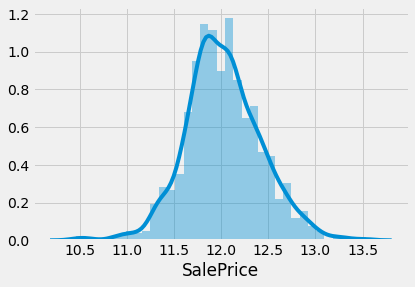

In [68]:
#Visualising Transformed SalePrice. 

sns.distplot(train.loc[:,'SalePrice'], norm_hist=True)

In [69]:
# Skewness and Fisher's Kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())  #Skewness and Kurtosis both have been reduced, and the Saleprice column is now approximately normally distributed.

Skewness: 0.121347
Kurtosis: 0.809519


### Outlier Treatment

In [70]:
def identify_outlier(feature): 
    sorted(feature) 
    lower_range = np.mean(feature) - (3 * np.std(feature)) 
    upper_range = np.mean(feature) + (3 * np.std(feature))  
    #Removing extreme outliers as Mean +- 4*StdDev
    return lower_range,upper_range

lower_range, upper_range = identify_outlier(train['MasVnrArea'])

overall_qual_drop = train[(train['MasVnrArea'] < lower_range) | (train['MasVnrArea'] > upper_range)]

def outlier_removal (df):
    numeric_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice',
                       'TotBathrooms', 'TotalSF', 'Total_porch_sf']
   #The numerical features for outlier removal were manually selected because mutiple numerical columns have a lot of zeros
   #in them post the missing value treatment, which exclude all the meaningful rows as outliers.
    
    for column in numeric_features:
        lower_range,upper_range = identify_outlier(df[column])
        overall_qual_drop = df[(df[column] < lower_range) | (df[column] > upper_range)]
        df.drop(overall_qual_drop.index, axis=0, inplace=True)
    return df

In [71]:
outlier_removal(train)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,14.663551,13.424521,110,53,19.378557,2,2,3,3,117.855872,...,0,0,0,1,0,0,0,1,0,12.247699
2,16.494888,13.694528,83,26,0.000000,1,2,3,3,146.805810,...,0,0,0,1,0,0,0,1,0,12.109016
3,15.044952,14.034134,108,52,17.721068,2,2,3,3,91.575291,...,0,0,0,1,0,0,0,1,0,12.317171
4,14.008495,13.683422,25,20,0.000000,1,2,2,4,52.776371,...,0,0,0,1,0,0,0,0,0,11.849405
5,16.954473,14.550143,107,50,25.323125,2,2,3,3,112.040333,...,0,0,0,1,0,0,0,1,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,14.273561,13.174703,111,55,0.000000,2,2,3,3,81.613627,...,0,0,0,1,0,0,0,1,0,12.128117
1456,14.273561,13.287740,106,50,0.000000,1,2,3,3,0.000000,...,0,0,0,1,0,0,0,1,0,12.072547
1457,17.067704,14.376784,85,38,15.304344,1,2,3,3,127.139215,...,0,0,0,1,0,0,0,1,0,12.254868


In [72]:
test.shape, train.shape

((1459, 361), (1303, 362))

### Splitting the dataset to separate Features and Predictor/Target Variable

In [73]:
Y_train = train['SalePrice'].reset_index(drop=True) #Saleprice column
X_train = train.drop(['SalePrice'], axis=1) #Remaining Training dataset

In [74]:
X_train.shape, Y_train.shape

((1303, 361), (1303,))

In [75]:
X_train

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,14.663551,13.424521,110,53,19.378557,2,2,3,3,117.855872,...,0,0,0,0,1,0,0,0,1,0
2,16.494888,13.694528,83,26,0.000000,1,2,3,3,146.805810,...,0,0,0,0,1,0,0,0,1,0
3,15.044952,14.034134,108,52,17.721068,2,2,3,3,91.575291,...,0,0,0,0,1,0,0,0,1,0
4,14.008495,13.683422,25,20,0.000000,1,2,2,4,52.776371,...,0,0,0,0,1,0,0,0,0,0
5,16.954473,14.550143,107,50,25.323125,2,2,3,3,112.040333,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,14.273561,13.174703,111,55,0.000000,2,2,3,3,81.613627,...,0,0,0,0,1,0,0,0,1,0
1456,14.273561,13.287740,106,50,0.000000,1,2,3,3,0.000000,...,0,0,0,0,1,0,0,0,1,0
1457,17.067704,14.376784,85,38,15.304344,1,2,3,3,127.139215,...,0,0,0,0,1,0,0,0,1,0


In [76]:
Y_train.describe()

count    1303.000000
mean       12.028193
std         0.358705
min        10.933000
25%        11.790565
50%        12.007567
75%        12.264346
max        13.091906
Name: SalePrice, dtype: float64

### Loading the Validation Dataset, test_actual_price.csv

In [77]:
actual_SalePrice_test = pd.read_csv(r'C:/Users/K2/OneDrive - Georgia State University/GSU - MSA - Assignment Submission/MSA 8010 - Data Programming/Final Project/test_actual_price.csv')

In [78]:
actual_SalePrice_test

,Id,SalePrice
0,1975,615000
1,1664,610000
2,2264,591587
3,2683,584500
4,1678,552000
...,...,...
1454,1916,57625
1455,1946,115000
1456,2217,13100
1457,2251,103000


In [79]:
test

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,16.494888,14.104341,68,11,0.000000,1,2,2,3,89.265752,...,0,0,0,0,1,0,0,0,1,0
1462,16.610808,14.551221,65,8,14.607283,1,2,2,3,141.193716,...,0,0,0,0,1,0,0,0,1,0
1463,15.784137,14.482936,104,48,0.000000,1,2,3,3,127.247695,...,0,0,0,0,1,0,0,0,1,0
1464,16.260928,13.776812,105,48,6.148426,1,2,2,3,105.834789,...,0,0,0,0,1,0,0,0,1,0
1465,11.556456,12.345545,99,42,0.000000,2,2,3,3,60.360928,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,7.529561,10.503898,77,20,0.000000,1,2,2,3,0.000000,...,0,0,0,0,1,0,0,0,1,0
2916,7.529561,10.463056,77,20,0.000000,1,2,2,3,58.629120,...,0,0,0,0,1,0,0,0,0,0
2917,24.243477,15.304041,67,46,0.000000,1,2,2,3,170.730570,...,0,0,0,0,1,0,0,0,0,0


## Let the Modelling Begin!!

### Scaling the Features

In [80]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(test)


### Decision Tree

In [81]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#rescaledX_train = scaler.fit_transform(X)
#rescaledX_test = scaler.fit_transform(test)
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(rescaledX_train,Y_train)
dtr_pred = dtr.predict(rescaledX_test)

In [82]:
dtr_pred

array([11.67420212, 11.88621856, 12.16525586, ..., 11.97980547,
       11.91773036, 12.39462889])

In [83]:
dtr_pred = np.expm1(dtr_pred)

In [84]:
prediction = pd.DataFrame(dtr_pred)

In [85]:
prediction['Id'] = prediction.index+1461

In [86]:
submission = prediction.rename(columns = {0:'Predicted_SalePrice'})

In [87]:
submission = pd.merge(submission, actual_SalePrice_test, how = "inner", on = "Id")

In [88]:
submission

,Predicted_SalePrice,Id,SalePrice
0,117500.0,1461,105000
1,145250.0,1462,172000
2,192000.0,1463,189900
3,179500.0,1464,195500
4,181000.0,1465,191500
...,...,...,...
1454,110500.0,2915,90500
1455,83500.0,2916,71000
1456,159500.0,2917,131000
1457,149900.0,2918,132000


In [89]:
print("R2 Square:", metrics.r2_score(np.array(submission['SalePrice']), dtr_pred))

R2 Square: 0.7647896266368804


In [90]:
mape = np.mean(np.abs(submission['SalePrice'] - submission['Predicted_SalePrice']) / submission['SalePrice'])
print(mape)

0.16647387739588348


### Random Forest Regression

In [91]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(rescaledX_train,Y_train)
rfr_pred = rfr.predict(rescaledX_test)

In [92]:
rfr_pred

array([11.71067642, 11.99570209, 12.12711032, ..., 12.01832885,
       11.66126904, 12.23750484])

In [93]:
rfr_pred = np.expm1(rfr_pred)

In [94]:
prediction = pd.DataFrame(rfr_pred)

In [95]:
prediction['Id'] = prediction.index+1461

In [96]:
submission = prediction.rename(columns = {0:'Predicted_SalePrice'})

In [97]:
submission = pd.merge(submission, actual_SalePrice_test, how = "inner", on = "Id")

In [98]:
submission

,Predicted_SalePrice,Id,SalePrice
0,121864.885780,1461,105000
1,162055.786920,1462,172000
2,184813.947238,1463,189900
3,191959.637660,1464,195500
4,195347.081146,1465,191500
...,...,...,...
1454,96889.759662,2915,90500
1455,102396.237740,2916,71000
1456,165764.406332,2917,131000
1457,115990.134026,2918,132000


In [99]:
print("R2 Square:", metrics.r2_score(np.array(submission['SalePrice']), rfr_pred))

R2 Square: 0.8741983483881585


In [100]:
mape = np.mean(np.abs(submission['SalePrice'] - submission['Predicted_SalePrice']) / submission['SalePrice'])
print(mape)

0.1106158372310935


### SVR Regression

In [101]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')

regressor.fit(rescaledX_train,Y_train)

regressor_pred = regressor.predict(rescaledX_test)

In [102]:
regressor_pred

array([11.72899675, 11.97832607, 12.18802033, ..., 12.01661274,
       11.69541726, 12.35310635])

In [103]:
regressor_pred = np.expm1(regressor_pred)

In [104]:
prediction = pd.DataFrame(regressor_pred)
prediction['Id'] = prediction.index+1461
submission = prediction.rename(columns = {0:'Predicted_SalePrice'})
submission = pd.merge(submission, actual_SalePrice_test, how = "inner", on = "Id")
submission

,Predicted_SalePrice,Id,SalePrice
0,124118.085489,1461,105000
1,159264.209070,1462,172000
2,196420.931071,1463,189900
3,204108.979947,1464,195500
4,192438.373074,1465,191500
...,...,...,...
1454,91778.259846,2915,90500
1455,112096.193913,2916,71000
1456,165480.178644,2917,131000
1457,120019.430360,2918,132000


In [105]:
print("R2 Square:", metrics.r2_score(np.array(submission['SalePrice']), regressor_pred))

R2 Square: 0.7591788461477508


In [106]:
mape = np.mean(np.abs(submission['SalePrice'] - submission['Predicted_SalePrice']) / submission['SalePrice'])
print(mape)

0.14101324940958182


### Ridge Regression

In [107]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)

model.fit(rescaledX_train,Y_train)

yhat = model.predict(rescaledX_test)

In [108]:
yhat

array([11.77670467, 11.98576389, 12.18740357, ..., 12.06009514,
       11.77805959, 12.29353969])

In [109]:
yhat = np.expm1(yhat)

In [110]:
prediction = pd.DataFrame(yhat)
prediction['Id'] = prediction.index+1461
submission = prediction.rename(columns = {0:'Predicted_SalePrice'})
submission = pd.merge(submission, actual_SalePrice_test, how = "inner", on = "Id")
submission

,Predicted_SalePrice,Id,SalePrice
0,130183.072746,1461,105000
1,160453.210435,1462,172000
2,196299.821646,1463,189900
3,207069.946298,1464,195500
4,193728.886512,1465,191500
...,...,...,...
1454,94080.301560,2915,90500
1455,91744.226948,2916,71000
1456,172834.427658,2917,131000
1457,130359.581467,2918,132000


In [111]:
print("R2 Square:", metrics.r2_score(np.array(submission['SalePrice']), yhat))

R2 Square: 0.8722286617693851


In [112]:
mape = np.mean(np.abs(submission['SalePrice'] - submission['Predicted_SalePrice']) / submission['SalePrice'])
print(mape)

0.09715535786673583


### XGBoost Regression

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)

model.fit(rescaledX_train,Y_train)

yhat_l = model.predict(rescaledX_test)

In [114]:
yhat_l

array([11.76690454, 12.01429822, 12.16645312, ..., 12.09207523,
       11.65308901, 12.22422441])

In [115]:
yhat_l = np.expm1(yhat_l)

In [116]:
prediction = pd.DataFrame(yhat_l)
prediction['Id'] = prediction.index+1461
submission = prediction.rename(columns = {0:'Predicted_SalePrice'})
submission = pd.merge(submission, actual_SalePrice_test, how = "inner", on = "Id")
submission

,Predicted_SalePrice,Id,SalePrice
0,128913.482403,1461,105000
1,165097.611020,1462,172000
2,192230.013413,1463,189900
3,200278.923053,1464,195500
4,181658.373063,1465,191500
...,...,...,...
1454,87725.336874,2915,90500
1455,94346.410463,2916,71000
1456,178451.052963,2917,131000
1457,115045.193477,2918,132000


In [117]:
print("R2 Square:", metrics.r2_score(np.array(submission['SalePrice']), yhat_l))

R2 Square: 0.8952298054309937


In [118]:
mape = np.mean(np.abs(submission['SalePrice'] - submission['Predicted_SalePrice']) / submission['SalePrice'])
print(mape)

0.09985871432457229


### RidgeCV Regression

In [119]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(rescaledX_train,Y_train)

clf = clf.predict(rescaledX_test)

In [120]:
clf

array([11.77670467, 11.98576389, 12.18740357, ..., 12.06009514,
       11.77805959, 12.29353969])

In [121]:
clf = np.expm1(clf)

In [122]:
prediction = pd.DataFrame(clf)
prediction['Id'] = prediction.index+1461
submission = prediction.rename(columns = {0:'Predicted_SalePrice'})
submission = pd.merge(submission, actual_SalePrice_test, how = "inner", on = "Id")
submission

,Predicted_SalePrice,Id,SalePrice
0,130183.072749,1461,105000
1,160453.210436,1462,172000
2,196299.821644,1463,189900
3,207069.946295,1464,195500
4,193728.886510,1465,191500
...,...,...,...
1454,94080.301563,2915,90500
1455,91744.226949,2916,71000
1456,172834.427658,2917,131000
1457,130359.581470,2918,132000


In [123]:
print("R2 Square:", metrics.r2_score(np.array(submission['SalePrice']), clf))

R2 Square: 0.8722286617642048


In [124]:
mape = np.mean(np.abs(submission['SalePrice'] - submission['Predicted_SalePrice']) / submission['SalePrice'])
print(mape)

0.0971553578699511


### And the winning model is Ridge Regression

In [128]:
submission = submission.drop(columns = ['SalePrice']).set_index('Id').rename(columns = {'Predicted_SalePrice':'SalePrice'})

In [129]:
submission.to_csv(r'C:/Users/K2/OneDrive - Georgia State University/GSU - MSA - Assignment Submission/MSA 8010 - Data Programming/Final Project/Data_Condas_Prediction.csv')